# Agenda today:
1. Overview of NLP
2. Model Building Remains Consistent
2. Pre-Processing for NLP 
    - Tokenization
    - Stopwords removal
    - Lexicon normalization: lemmatization and stemming
3. Feature Engineering for NLP
    - Bag-of-Words
    - Count Vectorizer
    - Term frequency-Inverse Document Frequency (tf-idf)


## 1. Overview of NLP
NLP allows computers to interact with text data in a structured and sensible way. In short, we will be breaking up series of texts into individual words (or groups of words), and isolating the words with **semantic value**.  We will then compare texts with similar distributions of these words, and group them together.

In this section, we will discuss some steps and approaches to common text data analytic procedures. In other words, with NLP, computers are taught to understand human language, its meaning and sentiments. Some of the applications of natural language processing are:
- Chatbots 
- Speech recognition and audio processing 
- Classifying documents 

Here is an example that uses some of the tools we use in this notebook.  
  -[chi_justice_project](https://chicagojustice.org/research/justice-media-project/)  
  -[chicago_justice classifier](https://github.com/chicago-justice-project/article-tagging/blob/master/lib/notebooks/bag-of-words-count-stemmed-binary.ipynb)

We will introduce you to the preprocessing steps, feature engineering, and other steps you need to take in order to format text data for machine learning tasks. 

We will also introduce you to [**NLTK**](https://www.nltk.org/) (Natural Language Toolkit), which will be our main tool for engaging with textual data.

# NLP process 
<img src="img/nlp_process.png" style="width:1000px;">

# 2. Model Building Principles Remain Consistent

We will be working with a dataset which includes both **satirical** (The Onion) and real news (Reuters) articles. 

### Vocab
> We refer to the entire set of articles as the **corpus**.  

In [11]:
import pandas as pd

corpus = pd.read_csv('data/satire_nosatire.csv')


Our goal is to detect satire, so our target class of 1 is associated with The Onion articles. 

![the_onion](img/the_onion.jpeg) ![reuters](img/reuters.png)

This is a highly relavent task.  If we could separate real news from fictitious news, we would be able to potentially flag the latter as such.  This does come with risks.  If we deploy a model which mislabel real news as ficticious news, we will open ourselves to all sorts of criticism.  A false positive in this sense to bury a story or do damage to a reporter's reputation. 

#### More Vocab
> Each article in the corpus is refered to as a **document**.

In [13]:
corpus.shape

(1000, 2)

In [15]:
# It is a balanced dataset with 500 documents of each category. 
corpus.target.value_counts()

1    500
0    500
Name: target, dtype: int64

In [18]:
# Let's look at some example texts from both categories
corpus[corpus.target==1].sample().body.values

corpus[corpus.target==0].sample().body.values

array([' Gabon foiled an attempted military coup on Monday, killing two suspected plotters and capturing seven others just hours after they took over state radio in a bid to end 50 years of rule by President Ali Bongo’s family. Government spokesman Guy-Bertrand Mapangou announced the deaths and arrests after soldiers briefly seized the radio station and broadcast a message saying Bongo was no longer fit for office after suffering a stroke in Saudi Arabia in October. The quick failure of Monday’s coup and the lack of widespread support suggest further efforts to overthrow Bongo are unlikely, analysts said. But the attempt alone shows a growing frustration with a government weakened by the President’s secretive medical leave. On Dec. 31, in one of his first television appearances since the stroke, Bongo, 59, slurred his speech and he appeared unable to move his right arm. It is unclear if he is able to walk. He has been in Morocco since November to continue treatment. In a radio message 

Let's think about our types of error and the use cases of being able to correctly separate satirical from authentic news. What type of error should we decide to optimize our models for?  

In [20]:
X = corpus.body
y = corpus.target


In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords

# A new preprocessing tool!

# This tool removes case punctuation, numbers, and stopwords in one fell swoop.
# We will break this down below
tfidf = TfidfVectorizer(token_pattern=r"([a-zA-Z]+(?:'[a-z]+)?)", stop_words=stopwords.words('english'))

# Like always, we are fitting only on the training set
X_t_vec = tfidf.fit_transform(X_t)
# Here is our new dataframe of predictors
X_t_vec = pd.DataFrame(X_t_vec.toarray(), columns = tfidf.get_feature_names())
X_t_vec.head()

,aaaaaaah,aaaaaah,aaaaargh,aaargh,aah,aahing,aap,aapl,aaron,ab,...,zooming,zoos,zor,zozovitch,zte,zuckerberg,zuercher,zverev,zych,zzouss
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### We can push this data into any of our classification models


In [27]:
from sklearn.linear_model import LogisticRegression
log_r = LogisticRegression()
log_r.fit(X_t_vec, y_t)

# Perfect on the training set. 
log_r.score(X_t_vec, y_t)

0.996875

# We proceed as usual:
    - Transform the validation set
    - Score the validation set
    - Plot a confusion matrix to check out the performance on different types of errors
 

0.9875


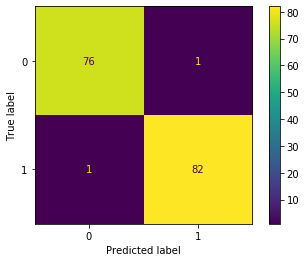

In [29]:
# Transform X_val
X_val_vec = tfidf.transform(X_val)
y_hat = log_r.predict(X_val_vec)
# Score val

print(log_r.score(X_val_vec, y_val))

# Plot confusion matrix
from sklearn.metrics import plot_confusion_matrix
# we should have a lot of true positive and true negatives
plot_confusion_matrix(log_r, X_val_vec, y_val)

#### How did your model do?  

Probably well.  
It's pretty amazing the patterns, even a relatively low power one such as logistic regression, can find in text data.

In [30]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

tfidf = TfidfVectorizer(token_pattern=r"([a-zA-Z]+(?:'[a-z]+)?)")
lr = LogisticRegression()
pipeline = make_pipeline(tfidf, lr)
pipeline

Pipeline(memory=None,
         steps=[('tfidfvectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token...ern="([a-zA-Z]+(?:'[a-z]+)?)",
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_inte

In [31]:
cross_val_score(pipeline, X_train, y_train).mean()


0.9737499999999999

In [32]:

pipeline.fit(X_train, y_train)


Pipeline(memory=None,
         steps=[('tfidfvectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token...ern="([a-zA-Z]+(?:'[a-z]+)?)",
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_inte

In [33]:

pipeline.score(X_test, y_test)
y_hat = pipeline.predict(X_test)

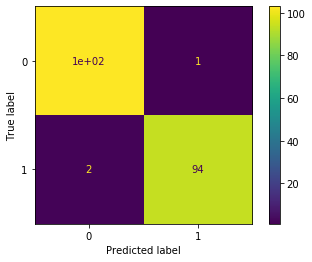

In [34]:

from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(pipeline, X_test, y_test)

# 3 Preprocessing

### Tokenization 

In order to convert the texts into data suitable for machine learning, we need to break down the documents into smaller parts. 

The first step in doing that is **tokenization**.

Tokenization is the process of splitting documents into units of observations. We usually represent the tokens as __n-gram__, where n represent the consecutive words occuring in a document. In the case of unigram (one word token), the sentence "David works here" can be tokenized into?

"David", "works", "here"
"David works", "works here"

Let's consider the first document in our corpus:

In [36]:
first_document = corpus.iloc[0].body

There are many ways to tokenize our document. 

It is a long string, so the first way we might consider is to split it by spaces.

In [38]:
first_document.split()[:30]

['Noting',
 'that',
 'the',
 'resignation',
 'of',
 'James',
 'Mattis',
 'as',
 'Secretary',
 'of',
 'Defense',
 'marked',
 'the',
 'ouster',
 'of',
 'the',
 'third',
 'top',
 'administration',
 'official',
 'in',
 'less',
 'than',
 'three',
 'weeks,',
 'a',
 'worried',
 'populace',
 'told',
 'reporters']

We are attempting to create a list of tokens whose semantic value reflects the class the document is associated with.  What issues might you see with the list of tokens generated by a simple split as performed above?

#### Chat out some problems (don't look down)

<img src="https://media.giphy.com/media/ZaiC2DYDRiqhQ269nz/giphy.gif" style="width:1500px;">

We are trying to create a set of tokens with **high semantic value**.  In other words, we want to isolate text which best represents the meaning in each document.  


## Common text cleaning tasks:  
  1. remove capitalization  
  2. remove punctuation  
  3. remove stopwords  
  4. remove numbers

We could manually perform all of these tasks with string operations

## Capitalization

When we create our matrix of words associated with our corpus, **capital letters** will mess things up.  The semantic value of a word used at the beginning of a sentence is the same as that same word in the middle of the sentence.  In the two sentences:

sentence_one =  "Excessive gerrymandering in small counties suppresses turnout."   
sentence_two =  "Turnout is suppressed in small counties by excessive gerrymandering."  

Excessive has the same semantic value, but will be treated as two separate tokens because of capitals.

### Let's fill in the list comprehension below to manually and remove capitals from the 1st document

In [41]:
## Manual removal of capitals

manual_cleanup = [token.lower() for token in first_document.split(' ')]
manual_cleanup[:25]

['noting',
 'that',
 'the',
 'resignation',
 'of',
 'james',
 'mattis',
 'as',
 'secretary',
 'of',
 'defense',
 'marked',
 'the',
 'ouster',
 'of',
 'the',
 'third',
 'top',
 'administration',
 'official',
 'in',
 'less',
 'than',
 'three',
 'weeks,']

By removing capitals, we decrease the total unique word count in our first document by 2.  That may not seem like much, but across an entire corpus, it will make a big difference.

## Punctuation

Like capitals, splitting on white space will create tokens which include punctuation that will muck up our semantics.  

Returning to the above example, 'gerrymandering' and 'gerrymandering.' will be treated as different tokens.

# Different ways to strip punctuation

# Strip with regex

To remove them, we will use regular expressions, a powerful tool which you may already have some familiarity with.

Regex allows us to match strings based on a pattern.  This pattern comes from a language of identifiers, which we can begin exploring on the cheatsheet found here:
  -   https://regexr.com/

A few key symbols:
  - . : matches any character
  - \d, \w, \s : represent digit, word, whitespace  
  - *, ?, +: matches 0 or more, 0 or 1, 1 or more of the preceding character  
  - [A-Z]: matches any capital letter  
  - [a-z]: matches lowercase letter  

Other helpful resources:

https://regexcrossword.com/  
https://www.regular-expressions.info/tutorial.html

In [47]:
pattern = r"[a-zA-Z]+"

target_word = manual_cleanup[10]
re.search(pattern, target_word).group(0)



'defense'

In [49]:
manual_cleanup = [re.search(pattern, word).group(0) for word in manual_cleanup if re.search(pattern, word)]

In [50]:

# Better solution 
import re

pattern = "([a-zA-Z]+(?:'[a-z]+)?)"
[re.match(pattern, word).group(0) for word in manual_cleanup]

['noting',
 'that',
 'the',
 'resignation',
 'of',
 'james',
 'mattis',
 'as',
 'secretary',
 'of',
 'defense',
 'marked',
 'the',
 'ouster',
 'of',
 'the',
 'third',
 'top',
 'administration',
 'official',
 'in',
 'less',
 'than',
 'three',
 'weeks',
 'a',
 'worried',
 'populace',
 'told',
 'reporters',
 'friday',
 'that',
 'it',
 'was',
 'unsure',
 'how',
 'many',
 'former',
 'trump',
 'staffers',
 'it',
 'could',
 'safely',
 'reabsorb',
 'jesus',
 'we',
 'can',
 'just',
 'take',
 'back',
 'these',
 'assholes',
 'all',
 'at',
 'once',
 'need',
 'time',
 'to',
 'process',
 'one',
 'before',
 'we',
 'get',
 'the',
 'next',
 'said',
 'year',
 'gregory',
 'birch',
 'of',
 'naperville',
 'il',
 'echoing',
 'the',
 'concerns',
 'of',
 'million',
 'americans',
 'in',
 'also',
 'noting',
 'that',
 'the',
 'country',
 'was',
 'only',
 'now',
 'truly',
 'beginning',
 'to',
 'reintegrate',
 'former',
 'national',
 'security',
 'advisor',
 'michael',
 'flynn',
 'this',
 'is',
 'just',
 'not',
 '

### Stopwords

Stopwords are the **filler** words in a language: prepositions, articles, conjunctions. They have low semantic value, and almost always need to be removed.  

Luckily, NLTK has lists of stopwords ready for our use.

As you notice above, stopwords come from the [nltk corpus package](http://www.nltk.org/book_1ed/ch02.html#tab-corpora).  The corpus package contains a variety of texts that are free to download and use.

Let's see which stopwords are present in our first document.

Let's also use the **FreqDist** tool to look at the makeup of our text before and after removal

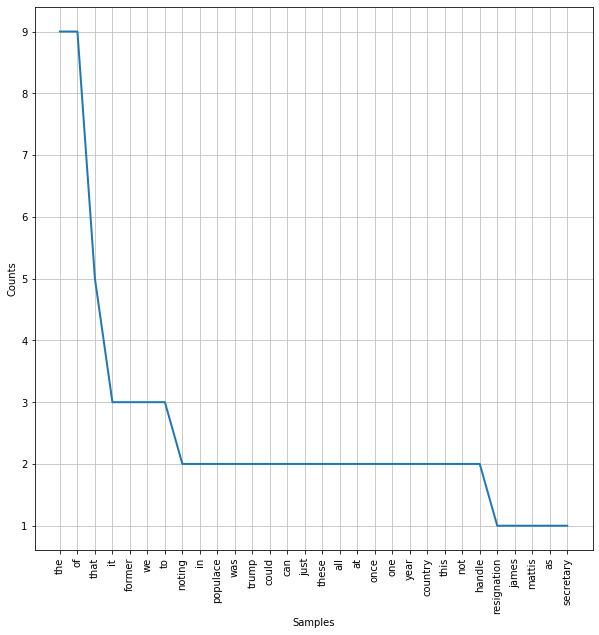

In [58]:
fdist = FreqDist(manual_cleanup)
plt.figure(figsize=(10,10))
fdist.plot(30)


In [61]:
# We can also customize our stopwords list

custom_sw = stopwords.words('english')
custom_sw.extend(["i'd","say"] )
custom_sw[-10:]

['wasn',
 "wasn't",
 'weren',
 "weren't",
 'won',
 "won't",
 'wouldn',
 "wouldn't",
 "i'd",
 'say']

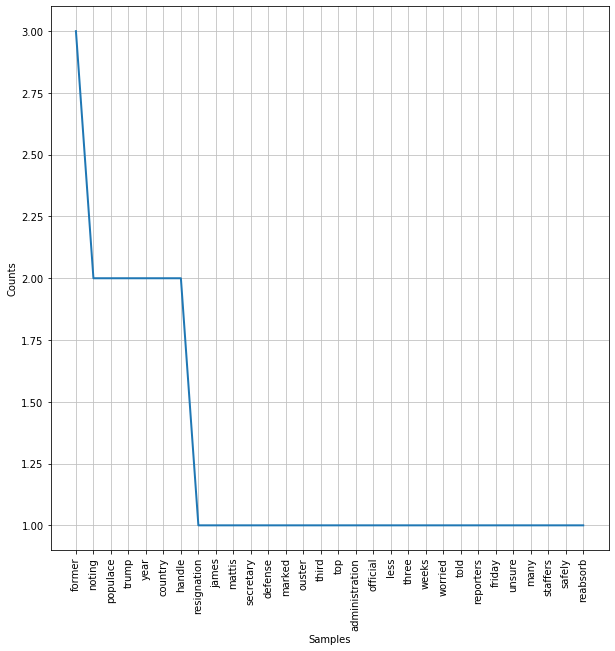

In [66]:
custom_sw.extend(['could', 'one'])
manual_cleanup = [token for token in manual_cleanup if token not in custom_sw]

fdist = FreqDist(manual_cleanup)
plt.figure(figsize=(10,10))
fdist.plot(30)

#### Numbers

Numbers also usually have low semantic value. Their removal can help improve our models. 

To remove them, we will use regular expressions, a powerful tool which you may already have some familiarity with.

Bringing back our regex symbols, we can quickly figure out patterns which will filter out numeric values.

A few key symbols:
  - . : matches any character
  - \d, \w, \s : represent digit, word, whitespace  
  - *, ?, +: matches 0 or more, 0 or 1, 1 or more of the preceding character  
  - [A-Z]: matches any capital letter  
  - [a-z]: matches lowercase letter  

In [68]:
no_num_pattern = r'[a-zA-Z]*'
test_string = "Reno 911"

re.search(no_num_pattern, test_string).group()

'Reno'

# Pair Exercise:  
Sklearn and NLTK provide us with a suite of **tokenizers** for our text preprocessing convenience.


We can use them to condense the steps above.  As we will see, even more steps will be condensed in the vectorizors introduced at the end of the notebook.  

For now, we will still need to make our list lowercase and remove stopwords by hand. 

It is important to get used to the process of tokenizing by hand, since it will give us more freedom in certain preprocessing steps (see stemmers/lemmers below).

For this exercise, take the sample_doc below and use the tokenizer of your choice to create word tokens.  If you use the regexp vectorizor, I have included a regex pattern that does not exclude contractions.  Feel free to pass that in as an argument.

After tokenizing, make tokens lowercase, and remove stopwords.

In [61]:

pattern = "([a-zA-Z]+(?:'[a-z]+)?)"

tokenizer = RegexpTokenizer(r"([a-zA-Z]+(?:[’'][a-z]+)?)")

sample_doc = X_t.sample(random_state=42).values[0]
sample_doc = tokenizer.tokenize(sample_doc)

sample_doc = [token.lower() for token in sample_doc]
sample_doc = [token for token in sample_doc if token not in custom_sw]

NameError: name 'custom_sw' is not defined

# Stemming

Most of the semantic meaning of a word is held in the root, which is usually the beginning of a word.  Conjugations and plurality do not change the semantic meaning. "eat", "eats", and "eating" all have essentially the same meaning packed into eat.   

Stemmers consolidate similar words by chopping off the ends of the words.

![stemmer](img/stemmer.png)

There are different stemmers available.  The two we will use here are the **Porter** and **Snowball** stemmers.  A main difference between the two is how agressively it stems, Porter being less agressive.

In [76]:
p_stemmer = PorterStemmer()
s_stemmer = SnowballStemmer(language="english")

In [78]:
p_stemmer.stem(sample_doc[0])
s_stemmer.stem(sample_doc[1])

'confirm'

In [81]:
sample_doc = [s_stemmer.stem(word) for word in sample_doc]

# Lemming

Lemming is a bit more sophisticated that the stem choppers.  Lemming uses part of speech tagging to determine how to transform a word.  In that 
Lemmatization returns real words. For example, instead of returning "movi" like Porter stemmer would, "movie" will be returned by the lemmatizer.

- Unlike Stemming, Lemmatization reduces the inflected words properly ensuring that the root word belongs to the language.  It can handle words such as "mouse", whose plural "mice" the stemmers would not lump together with the original. 

- In Lemmatization, the root word is called Lemma. 

- A lemma (plural lemmas or lemmata) is the canonical form, dictionary form, or citation form of a set of words.

![lemmer](img/lemmer.png)


In [85]:
lemmatizer = WordNetLemmatizer() 

In [87]:
print(f'Mice becomes: {lemmatizer.lemmatize("mice")}')

Mice becomes: mouse


Lemmatizers depend on POS tagging, and defaults to noun.

With a little bit of work, we can POS tag our text.

In [95]:
new_sample_tagged = pos_tag(new_sample)
new_sample_tagged

[('Sudanese', 'JJ'),
 ('authorities', 'NNS'),
 ('blocking', 'VBG'),
 ('access', 'NN'),
 ('popular', 'JJ'),
 ('social', 'JJ'),
 ('media', 'NNS'),
 ('platforms', 'NNS'),
 ('used', 'VBD'),
 ('organise', 'RB'),
 ('broadcast', 'JJ'),
 ('nationwide', 'JJ'),
 ('anti', 'JJ'),
 ('government', 'NN'),
 ('protests', 'NNS'),
 ('triggered', 'VBD'),
 ('economic', 'JJ'),
 ('crisis', 'NN'),
 ('internet', 'NN'),
 ('users', 'NNS'),
 ('Sudan', 'NNP'),
 ('rocked', 'VBD'),
 ('near', 'IN'),
 ('daily', 'JJ'),
 ('demonstrations', 'NNS'),
 ('past', 'IN'),
 ('two', 'CD'),
 ('weeks', 'NNS'),
 ('Protesters', 'NNPS'),
 ('set', 'VBD'),
 ('alight', 'RP'),
 ('ruling', 'VBG'),
 ('party', 'NN'),
 ('buildings', 'NNS'),
 ('called', 'VBN'),
 ('President', 'NNP'),
 ('Omar', 'NNP'),
 ('al', 'NN'),
 ('Bashir', 'NNP'),
 ('took', 'VBD'),
 ('power', 'NN'),
 ('step', 'NN'),
 ('In', 'IN'),
 ('country', 'NN'),
 ('state', 'NN'),
 ('tightly', 'RB'),
 ('controls', 'VBZ'),
 ('traditional', 'JJ'),
 ('media', 'NNS'),
 ('internet', 'NN'),

In [99]:
new_sample_lemmed = [lemmatizer.lemmatize(token[0], token[1]) for token in new_sample_tagged]

## 4. Feature Engineering for NLP 
The machine learning algorithms we have encountered so far represent features as the variables that take on different value for each observation. For example, we represent individual with distinct education level, income, and such. However, in NLP, features are represented in very different way. In order to pass text data to machine learning algorithm and perform classification, we need to represent the features in a sensible way. One such method is called **Bag-of-words (BoW)**. 

A bag-of-words model, or BoW for short, is a way of extracting features from text for use in modeling. A bag-of-words is a representation of text that describes the occurrence of words within a document. It involves two things:

- A vocabulary of known words.
- A measure of the presence of known words.

It is called a “bag” of words, because any information about the order or structure of words in the document is discarded. The model is only concerned with whether known words occur in the document, not where in the document. The intuition behind BoW is that a document is similar to another if they have similar contents. Bag of Words method can be represented as **Document Term Matrix**, or Term Document Matrix, in which each column is an unique vocabulary, each observation is a document. For example:

- Document 1: "I love dogs"
- Document 2: "I love cats"
- Document 3: "I love all animals"
- Document 4: "I hate dogs"


Can be represented as:

![document term matrix](img/document_term_matrix.png)

In [ ]:
vec = CountVectorizer()
X = vec.fit_transform([" ".join(new_sample_lemmed)])


df = pd.DataFrame(X.toarray(), columns = vec.get_feature_names())
df.head()

That is not very exciting for one document. The idea is to make a document term matrix for all of the words in our corpus.

We can pass in arguments such as a regex pattern, a list of stopwords, and an ngram range to do our preprocessing in one fell swoop.   
*Note lowercase defaults to true.*

In [319]:
vec = CountVectorizer(token_pattern=r"([a-zA-Z]+(?:'[a-z]+)?)", stop_words=custom_sw, ngram_range=[1,2])
X = vec.fit_transform(corpus.body[0:2])

df = pd.DataFrame(X.toarray(), columns = vec.get_feature_names())
df.head()

,adding,adding wants,administration,administration official,advisor,advisor michael,also,also noting,americans,americans also,...,witnesses want,work,work investigating,worried,worried populace,year,year country,year old,yet,yet another
0,0,0,1,1,1,1,1,1,1,1,...,0,0,0,1,1,2,1,1,0,0
1,1,1,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,1,1


Our document term matrix gets bigger and bigger, with more and more zeros, becoming sparser and sparser.

> In case you forgot, a sparse matrix "is a matrix in which most of the elements are zero." [wikipedia](https://en.wikipedia.org/wiki/Sparse_matrix)

We can set upper and lower limits to the word frequency.

### TF-IDF 
There are many schemas for determining the values of each entry in a document term matrix, and one of the most common schema is called the TF-IDF -- term frequency-inverse document frequency. Essentially, tf-idf *normalizes* the raw count of the document term matrix. And it represents how important a word is in the given document. 

> The goal of using tf-idf instead of the raw frequencies of occurrence of a token in a given document is to scale down the impact of tokens that occur very frequently in a given corpus and that are hence empirically less informative than features that occur in a small fraction of the training corpus.

- TF (Term Frequency)
term frequency is the frequency of the word in the document divided by the total words in the document.

- IDF (inverse document frequency)
IDF represents the measure of how much information the word provides, i.e., if it's common or rare across all documents. It is the logarithmically scaled inverse fraction of the documents that contain the word (obtained by dividing the total number of documents by the number of documents containing the term, and then taking the logarithm of that quotient):

$$idf(w) = log (\frac{number\ of\ documents}{num\ of\ documents\ containing\ w})$$

tf-idf is the product of term frequency and inverse document frequency, or tf * idf. 

In [325]:
tf_vec = TfidfVectorizer(token_pattern=r"([a-zA-Z]+(?:'[a-z]+)?)", stop_words=custom_sw)
X = tf_vec.fit_transform(corpus.body)

df = pd.DataFrame(X.toarray(), columns = tf_vec.get_feature_names())
df.head()

,aa,aaaaaaah,aaaaaah,aaaaargh,aaaah,aaah,aaargh,aah,aahing,aap,...,zoos,zor,zozovitch,zte,zuckerberg,zuercher,zverev,zych,zzouss,zzzzzst
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Let's compare the tfidf to the count vectorizer output for one document.

The tfidf lessoned the importance of some of the more common words, including a stopword which "also" which didn't make it into the stopword list.

It also assigns "nerds" more weight than power.  

# Pair: 

For a final exercise, work through in pairs the following exercise.

Create a document term matrix of the 1000 document corpus.  The vocabulary should have no stopwords, no numbers, no punctuation, and be lemmatized.  The Document-Term Matrix should be created using tfidf.

In [332]:
corpus = pd.read_csv('data/satire_nosatire.csv')


In [333]:
def doc_preparer(doc, stop_words=custom_sw):
    '''
    
    :param doc: a document from the satire corpus 
    :return: a document string with words which have been 
            lemmatized, 
            parsed for stopwords, 
            made lowercase,
            and stripped of punctuation and numbers.
    '''
    
    regex_token = RegexpTokenizer(r"([a-zA-Z]+(?:’[a-z]+)?)")
    doc = regex_token.tokenize(doc)
    doc = [word.lower() for word in doc]
    doc = [word for word in doc if word not in stop_words]
    doc = pos_tag(doc)
    doc = [(word[0], get_wordnet_pos(word[1])) for word in doc]
    lemmatizer = WordNetLemmatizer() 
    doc = [lemmatizer.lemmatize(word[0], word[1]) for word in doc]
    return ' '.join(doc)


In [334]:
docs = [doc_preparer(doc) for doc in corpus.body]

In [335]:
tf_idf = TfidfVectorizer(min_df = .05)
X = tf_idf.fit_transform(docs)

df = pd.DataFrame(X.toarray())
df.columns = tf_idf.vocabulary_
df.head()

,secretary,mark,third,top,administration,official,less,three,week,tell,...,reserve,economy,october,militant,reporting,seven,syria,dec,minimum,lawmaker
0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.162442,0.0,0.000000,0.000000,0.0
1,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.078375,0.0,0.0,0.000000,0.0,0.000000,0.0,0.106884,0.000000,0.0
2,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0
3,0.0,0.13159,0.0,0.0,0.0,0.0,0.0,0.0,0.208572,0.000000,...,0.077942,0.0,0.0,0.061257,0.0,0.000000,0.0,0.000000,0.128578,0.0
4,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.149827,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0
